# Ethereum data analysis (log return)
## Yepeng Ding
### 12/13/2019

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.tsa.api as smt
from arch import arch_model

### Import data

In [2]:
data = pd.read_csv('./data/ETH_USD_2015-08-09_2019-12-19-CoinDesk.csv')
data_date = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data_cp = data['Closing Price (USD)']
data_size = len(data_cp)
print(data_cp.describe())

count    1584.000000
mean      202.635697
std       244.002299
min         0.428394
25%        11.243948
50%       147.939067
75%       285.844500
max      1405.210000
Name: Closing Price (USD), dtype: float64


### Plot daily index

/Users/michaeltei/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


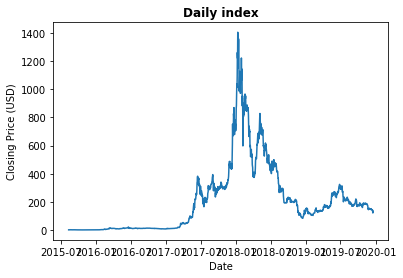

In [3]:
plt.title("Daily index", weight='bold')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.plot(data_date, data_cp)
plt.show()

### Calculate log return

In [4]:
returns = pd.Series(np.diff(np.log(data_cp)))
print(returns.describe())
print('Skewness', stats.skew(returns))
print('Kurtosis', stats.kurtosis(returns))
print('Jarque–Bera test', stats.jarque_bera(returns))

count    1583.000000
mean        0.003154
std         0.067369
min        -0.400131
25%        -0.024138
50%         0.000000
75%         0.027639
max         0.432697
dtype: float64
Skewness 0.4822534984884875
Kurtosis 5.683923220380027
Jarque–Bera test (2192.274071172824, 0.0)


### Plot log return

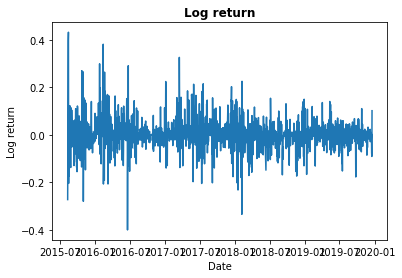

In [5]:
plt.title("Log return", weight='bold')
plt.xlabel('Date')
plt.ylabel('Log return')
plt.plot(data_date[1:], returns)
plt.show()

### Calculate squared log return

In [6]:
squared_returns = returns ** 2
print(squared_returns.describe())

count    1583.000000
mean        0.004546
std         0.012658
min         0.000000
25%         0.000124
50%         0.000665
75%         0.003332
max         0.187227
dtype: float64


### Plot squared log return

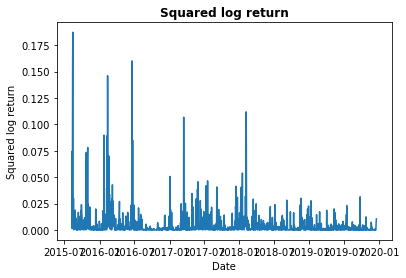

In [7]:
plt.title("Squared log return", weight='bold')
plt.xlabel('Date')
plt.ylabel('Squared log return')
plt.plot(data_date[1:], squared_returns)
plt.show()

### Calculate autocorrelation of log return

In [8]:
returns_acf = pd.DataFrame(smt.stattools.acf(returns,nlags=len(returns)))
print(returns_acf.describe())

                 0
count  1583.000000
mean      0.000316
std       0.031038
min      -0.070186
25%      -0.010884
50%      -0.000283
75%       0.009723
max       1.000000


### Plot autocorrelation of log return

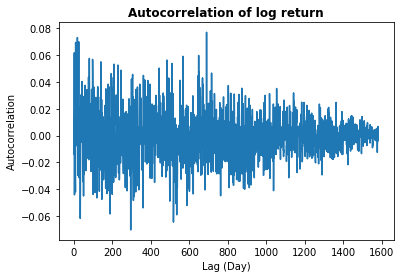

In [9]:
plt.title("Autocorrelation of log return", weight='bold')
plt.xlabel('Lag (Day)')
plt.ylabel('Autocorrelation')
plt.plot(returns_acf[1:])
plt.show()

### Calculate autocorrelation of squared log return

In [10]:
squared_returns_acf = pd.DataFrame(smt.stattools.acf(squared_returns,nlags=len(squared_returns)))
print(squared_returns_acf.describe())

                 0
count  1583.000000
mean      0.000316
std       0.035757
min      -0.039246
25%      -0.014283
50%      -0.007312
75%       0.005789
max       1.000000


### Plot autocorrelation of squared log return

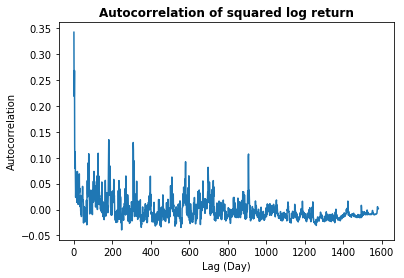

In [11]:
plt.title("Autocorrelation of squared log return", weight='bold')
plt.xlabel('Lag (Day)')
plt.ylabel('Autocorrelation')
plt.plot(squared_returns_acf[1:])
plt.show()

### GARCH model of log return

In [12]:
garch = arch_model(returns * 100)
garch_result = garch.fit()
print(garch_result.summary())
print('(alpha+beta) = ', garch_result.params['alpha[1]'] + garch_result.params['beta[1]'])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5006.10528349611
Iteration:      2,   Func. Count:     14,   Neg. LLF: 5002.448621546757
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5000.3350691822925
Iteration:      4,   Func. Count:     30,   Neg. LLF: 5000.001601184974
Iteration:      5,   Func. Count:     37,   Neg. LLF: 4998.6277301101545
Iteration:      6,   Func. Count:     44,   Neg. LLF: 4998.047883537809
Iteration:      7,   Func. Count:     51,   Neg. LLF: 4997.385355099489
Iteration:      8,   Func. Count:     57,   Neg. LLF: 4997.191616436188
Iteration:      9,   Func. Count:     63,   Neg. LLF: 4997.181281931629
Iteration:     10,   Func. Count:     69,   Neg. LLF: 4997.180925660097
Iteration:     11,   Func. Count:     75,   Neg. LLF: 4997.180924539598
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 4997.18092453955
            Iterations: 11
            Function evaluations: 75
            Gradient evaluations: 1

### Visualize the standardized residuals and conditional volatility

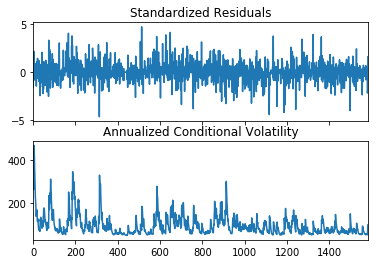

In [13]:
garch_fig = garch_result.plot(annualize='D')

### GJR-GARCH model of log return

In [14]:
gjr = arch_model(returns * 100, p=1, o=1, q=1)
gjr_result = gjr.fit(disp='off')
print(gjr_result.summary())
print('(1-alpha-beta-0.5*gamma) = ', 1 - gjr_result.params['alpha[1]'] - gjr_result.params['beta[1]'] - 0.5 * gjr_result.params['gamma[1]'])

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                   None   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:               -4995.38
Distribution:                  Normal   AIC:                           10000.8
Method:            Maximum Likelihood   BIC:                           10027.6
                                        No. Observations:                 1583
Date:                Thu, Dec 19 2019   Df Residuals:                     1578
Time:                        17:30:30   Df Model:                            5
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1107      0.119      0.930      0.352 [ -0.123,  0.34

### Calculate frequency of log return

In [15]:
# Adjust decimal point
precision = 3
returns = pd.DataFrame(np.around(returns, decimals=precision))

returns_frequency = returns.iloc[:,0].value_counts()

# Sort by the index
returns_frequency.sort_index(inplace=True)

print(returns_frequency.describe())

count    317.000000
mean       4.993691
std        5.467391
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       33.000000
Name: 0, dtype: float64


### Plot frequency of log return

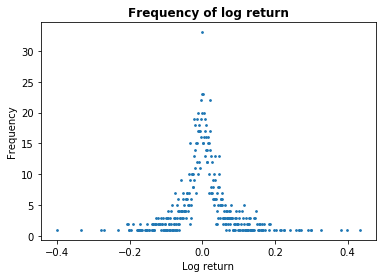

In [16]:
plt.title("Frequency of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Frequency')
plt.scatter(returns_frequency.index, returns_frequency, s=3)
plt.show()

### Calculate probability density of log return

In [17]:
returns_pdf = returns_frequency / sum(returns_frequency)
print(returns_pdf.describe())

count    317.000000
mean       0.003155
std        0.003454
min        0.000632
25%        0.000632
50%        0.001895
75%        0.003790
max        0.020846
Name: 0, dtype: float64


### Plot probability distribution of log return

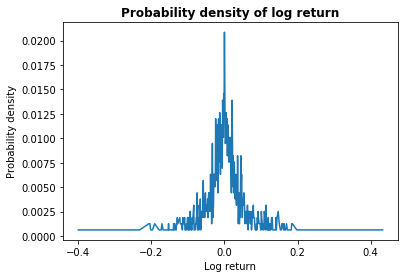

In [18]:
plt.title("Probability density of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Probability density')
plt.plot(returns_pdf.index, returns_pdf)
plt.show()

### Normalize probability density of log return

In [19]:
interval_length = 10 ** (-precision)
returns_pdf_norm = returns_pdf / sum(returns_pdf * interval_length)
print(returns_pdf_norm.describe())

count    317.000000
mean       3.154574
std        3.453816
min        0.631712
25%        0.631712
50%        1.895136
75%        3.790272
max       20.846494
Name: 0, dtype: float64


### Plot probability density normalization of log return

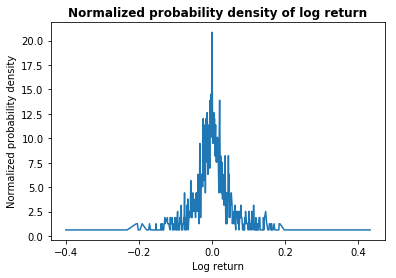

In [20]:
plt.title("Normalized probability density of log return", weight='bold')
plt.xlabel('Log return')
plt.ylabel('Normalized probability density')
plt.plot(returns_pdf_norm.index, returns_pdf_norm)
plt.show()
